<font color=blue>
Faraz  Hasmi & Sourabh Singh <br>
21st February, 2021
    </font>

# <font color=navy><u>Telecom Churn Case Study</font>
***
#### <font color=navy> Problem Statement: </font> <br>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


#### <font color=navy> Business Goal: </font> <br>

The below model is developed to help a leading telecom firm: 
- To identify customers at high risk of churn and 
- To identify the main indicators of churn.
- This project is based on the Indian and Southeast Asian market
- Churn Phases
    - In ‘Good’ phase the customer is happy with the service and behaves as usual
    - In ‘Action’ phase The customer experience starts to sore in this phase
    - In ‘Churn’ phase the customer is said to have churned
    

### Define imports

In [125]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as statsmod

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score,precision_score

from warnings import filterwarnings
filterwarnings("ignore")

### Load dataframe

In [118]:
pd.set_option('display.max_columns', None)

#Evaluation Metric Dataframe
eval_metrics_df = pd.DataFrame(index=["Logistic Regression","Decision Tree","Random Forest"],columns =['Accuracy%','Sensitivity%','Specificity%','Precision%'])
eval_metrics_df = eval_metrics_df.fillna(0)

In [3]:
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
churn_data.shape

(99999, 226)

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### User Defined Functions

In [121]:
#function to check for nulls and only display the columns having null count>0
def null_check(dataframe, percentage=True, perc_limit=1):
    if percentage==True:
        return round(dataframe.isnull().mean()[(dataframe.isnull().mean()>0) & (dataframe.isnull().mean()<perc_limit)].apply(lambda x: x*100),3)
    else:
        return dataframe.isnull().sum()[dataframe.isnull().sum()>perc_limit]
    
#function to drop irrelevant columns
def drop_irrelevant_columns(dataframe, column_list):
    dataframe.drop(column_list, axis=1, inplace=True, errors='ignore')
    
#function to drop rows of columns with insignificant nulls
def drop_insignificant_rows(dataframe,column_list):
    dataframe.dropna(subset=column_list, inplace=True)
    
#Function for Evaluation metrics 
def Eval_metrics(test,test_pred ,string):
    print("Confusion matrix is as follows:")
    print(confusion_matrix(test, test_pred))
    
    # True Positives
    TP = confusion_matrix(test, test_pred)[1, 1]
    # True Negatives
    TN = confusion_matrix(test, test_pred)[0, 0]
    # False Positives
    FP = confusion_matrix(test, test_pred)[0, 1]
    # False Negatives
    FN = confusion_matrix(test, test_pred)[1, 0]
   
    eval_metrics_df.loc[string]['Accuracy%']  = accuracy_score(test,test_pred)*100
    eval_metrics_df.loc[string]['Sensitivity%']  = recall_score(test,test_pred)*100
    eval_metrics_df.loc[string]['Specificity%']  = (TN / float(TN + FP))*100
    eval_metrics_df.loc[string]['Precision%']  = precision_score(test, test_pred)*100
    
    return eval_metrics_df[eval_metrics_df['Accuracy%']!=0]

### Filter high value customers - Starts

Check to browse all columns for month 6 (same columns apply for month 7,8 and 9)

In [7]:
lst_mnth_6_cols = list(filter(lambda x: '_6' in x,churn_data.columns))
lst_mnth_6_cols

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 

In [8]:
churn_data[lst_mnth_6_cols].head()

,last_date_of_month_6,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,6/30/2014,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,6/21/2014,252,6/21/2014,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,6/30/2014,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,6/29/2014,44,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,6/30/2014,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,6/17/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,6/30/2014,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,6/28/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,6/30/2014,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,6/26/2014,50,6/4/2014,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0


#### Derive total overall recharge amount

Total overall recharge amount is sum of 'total_rech_amt_*' and 'av_rech_amt_data_*'

We need to perform data cleaning on these set of columns as we are deriving total amount from them.

Data cleaning for other columns will be performed later in 'Data Cleaning' section.

#### Check all total_rech_amt_ columns

In [9]:
lst_total_rech_amt_cols = list(filter(lambda x: 'total_rech_amt_' in x,churn_data.columns))
lst_total_rech_amt_cols

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9']

In [10]:
null_check(churn_data[lst_total_rech_amt_cols].reset_index())

Series([], dtype: float64)

No nulls detected in lst_total_rech_amt_* columns

In [11]:
churn_data[lst_total_rech_amt_cols].quantile([0.01, 0.05, 0.5, 0.95,0.99, 1])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
0.01,0.00,0.0,0.0,0.0
0.05,0.00,0.0,0.0,0.0
0.50,230.00,220.0,225.0,200.0
0.95,994.00,993.0,996.0,968.0
0.99,1683.02,1728.0,1721.0,1678.0
1.00,35190.00,40335.0,45320.0,37235.0


There are some outliers, but they could be legit high recharge amounts

#### Check all data_ columns

In [12]:
lst_data_cols = list(filter(lambda x: 'data' in x,churn_data.columns))
lst_data_cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [13]:
churn_data[lst_data_cols].head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


Notice that a lot of rows are NaN. Handling these columns now.

In [14]:
churn_data[lst_data_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_data_6  25153 non-null  object 
 1   date_of_last_rech_data_7  25571 non-null  object 
 2   date_of_last_rech_data_8  26339 non-null  object 
 3   date_of_last_rech_data_9  25922 non-null  object 
 4   total_rech_data_6         25153 non-null  float64
 5   total_rech_data_7         25571 non-null  float64
 6   total_rech_data_8         26339 non-null  float64
 7   total_rech_data_9         25922 non-null  float64
 8   max_rech_data_6           25153 non-null  float64
 9   max_rech_data_7           25571 non-null  float64
 10  max_rech_data_8           26339 non-null  float64
 11  max_rech_data_9           25922 non-null  float64
 12  av_rech_amt_data_6        25153 non-null  float64
 13  av_rech_amt_data_7        25571 non-null  float64
 14  av_rec

Check nulls on data columns

In [15]:
null_check(churn_data[lst_data_cols].reset_index())

date_of_last_rech_data_6    74.847
date_of_last_rech_data_7    74.429
date_of_last_rech_data_8    73.661
date_of_last_rech_data_9    74.078
total_rech_data_6           74.847
total_rech_data_7           74.429
total_rech_data_8           73.661
total_rech_data_9           74.078
max_rech_data_6             74.847
max_rech_data_7             74.429
max_rech_data_8             73.661
max_rech_data_9             74.078
av_rech_amt_data_6          74.847
av_rech_amt_data_7          74.429
av_rech_amt_data_8          73.661
av_rech_amt_data_9          74.078
dtype: float64

Date, total_rech_data and max_rech_data are having equal number of nulls monthwise

These rows indicate data recharge was not done. We will fill amount columns with 0 and leave date fields as is.

In [16]:
lst_data_float_cols = list(filter(lambda x: 'date' not in x,lst_data_cols))
lst_data_float_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

Fill 0 for numeric columns

In [17]:
churn_data[lst_data_float_cols] = churn_data[lst_data_float_cols].fillna(0)

Check null again

In [18]:
null_check(churn_data[lst_data_float_cols].reset_index())

Series([], dtype: float64)

No nulls in data and rech columns

#### Derive total overall recharge amount

In [19]:
churn_data['total_overall_rech_amt_6'] = churn_data['total_rech_amt_6'] + (churn_data['av_rech_amt_data_6']*churn_data['total_rech_data_6'])
churn_data['total_overall_rech_amt_7'] = churn_data['total_rech_amt_7'] + (churn_data['av_rech_amt_data_7']*churn_data['total_rech_data_7'])
churn_data['total_overall_rech_amt_8'] = churn_data['total_rech_amt_8'] + (churn_data['av_rech_amt_data_8']*churn_data['total_rech_data_8'])

#### Derive average good phase recharge amount (month 6 and 7) 

In [20]:
churn_data['avg_good_phase_rech_amt'] = (churn_data['total_overall_rech_amt_6'] + churn_data['total_overall_rech_amt_7'])/2

#### Validate if average is done properly

In [21]:
churn_data[['total_overall_rech_amt_6','total_overall_rech_amt_7','avg_good_phase_rech_amt']].head()

,total_overall_rech_amt_6,total_overall_rech_amt_7,avg_good_phase_rech_amt
0,614.0,504.0,559.0
1,74.0,538.0,306.0
2,168.0,315.0,241.5
3,230.0,310.0,270.0
4,252.0,350.0,301.0


#### Get 70th percentile for average good phase recharge amount

In [22]:
high_value_rech_amt = churn_data['avg_good_phase_rech_amt'].quantile(0.7)
high_value_rech_amt

478.0

#### Filter out to only have entries with last months total recharge amount being greater than high value rech amnt

In [23]:
churn_data_hvc = churn_data[churn_data['avg_good_phase_rech_amt']>=high_value_rech_amt]

In [24]:
churn_data_hvc.shape

(30001, 230)

### Filter high value customers - Ends

<b>churn_data_hvc</b> dataframe will be used going forward

### Data Cleaning - Handle Nulls - Starts

In [25]:
null_check(churn_data_hvc)

loc_og_t2o_mou           0.747
std_og_t2o_mou           0.747
loc_ic_t2o_mou           0.747
last_date_of_month_7     0.090
last_date_of_month_8     0.550
                         ...  
night_pck_user_9        49.268
fb_user_6               44.149
fb_user_7               43.145
fb_user_8               46.825
fb_user_9               49.268
Length: 154, dtype: float64

#### Find columns with less than 6 pct null rows

In [26]:
rows_6pc_or_less_nulls = null_check(churn_data_hvc, perc_limit=0.06)
lst_rows_6pc_or_less_nulls = pd.DataFrame(rows_6pc_or_less_nulls).index
lst_rows_6pc_or_less_nulls

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8'

#### Drop rows with less than 6 pct nulls

In [27]:
drop_insignificant_rows(churn_data_hvc, lst_rows_6pc_or_less_nulls)

#### Drop irrelevant columns : mobile_number and circle_id are id columns and shouldn't impact classification

In [28]:
drop_irrelevant_columns(churn_data_hvc,['mobile_number','circle_id'])

#### Check nulls again

In [29]:
null_check(churn_data_hvc)

onnet_mou_9                  2.263
offnet_mou_9                 2.263
roam_ic_mou_9                2.263
roam_og_mou_9                2.263
loc_og_t2t_mou_9             2.263
loc_og_t2m_mou_9             2.263
loc_og_t2f_mou_9             2.263
loc_og_t2c_mou_9             2.263
loc_og_mou_9                 2.263
std_og_t2t_mou_9             2.263
std_og_t2m_mou_9             2.263
std_og_t2f_mou_9             2.263
std_og_t2c_mou_9             2.263
std_og_mou_9                 2.263
isd_og_mou_9                 2.263
spl_og_mou_9                 2.263
og_others_9                  2.263
loc_ic_t2t_mou_9             2.263
loc_ic_t2m_mou_9             2.263
loc_ic_t2f_mou_9             2.263
loc_ic_mou_9                 2.263
std_ic_t2t_mou_9             2.263
std_ic_t2m_mou_9             2.263
std_ic_t2f_mou_9             2.263
std_ic_t2o_mou_9             2.263
std_ic_mou_9                 2.263
spl_ic_mou_9                 2.263
isd_ic_mou_9                 2.263
ic_others_9         

In [30]:
lst_cols_to_handle_null = null_check(churn_data_hvc).index
lst_cols_to_handle_null

Index(['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'nig

In [31]:
churn_data_hvc[lst_cols_to_handle_null].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,0.0,81.46,0.0,0.00,0.0,4.03,17.34,0.00,21.38,0.00,13.53,0.00,0.0,13.53,0.00,0.00,0.00,NaN,7/31/2014,8/23/2014,NaN,NaN,2.0,3.0,NaN,NaN,0.0,0.0,NaN,NaN,0.00,19.83,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
21,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,137.53,131.64,762.34,0.00,0.0,893.99,0.0,0.00,0.0,17.99,113.46,8.41,139.88,16.74,95.98,0.00,0.0,112.73,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,101.93,0.00,11.44,3.89,0.0,15.34,0.0,10.35,0.0,45.36,75.83,0.00,121.19,1.08,5.20,0.00,0.0,6.28,0.00,0.00,0.00,NaN,7/7/2014,8/6/2014,9/9/2014,NaN,0.0,0.0,0.0,NaN,2.0,2.0,1.0,NaN,306.57,197.27,212.17,NaN,301.78,150.67,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0
33,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.7,0.00,0.0,0.41,8.01,9.81,18.24,8.53,15.79,9.81,0.0,34.14,0.08,61.41,0.26,6/30/2014,7/28/2014,8/26/2014,9/10/2014,0.0,0.0,0.0,0.0,5.0,8.0,1.0,2.0,897.6,2294.03,405.26,764.28,931.58,2200.20,391.92,771.39,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


These fields are NaN indicating that no data recharge was done and no night pack selected <br/> Also we will assume that these NaN users are not fb_user

We will be handling all date columns later in Data Cleaning - Data types section

#### Handle nulls for remaining numeric values

In [32]:
lst_cols_to_handle_null = list(filter(lambda x: 'date' not in x,lst_cols_to_handle_null))
lst_cols_to_handle_null

['onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [33]:
churn_data_hvc[lst_cols_to_handle_null] = churn_data_hvc[lst_cols_to_handle_null].fillna(0)

In [34]:
null_check(churn_data_hvc)

date_of_last_rech_data_6    44.243
date_of_last_rech_data_7    42.690
date_of_last_rech_data_8    44.870
date_of_last_rech_data_9    47.151
dtype: float64

#### Only Date columns are left with NULL - This will be handled later when we will derive days from it

In [35]:
churn_data_hvc.shape

(27749, 228)

### Data Cleaning - Handle Nulls - Ends

### Data Cleaning - Handle Date Types - Starts

In [36]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 7 to 99997
Columns: 228 entries, loc_og_t2o_mou to avg_good_phase_rech_amt
dtypes: float64(183), int64(33), object(12)
memory usage: 48.5+ MB


In [37]:
lst_date_cols = churn_data_hvc.select_dtypes(include='object').columns
lst_date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [38]:
churn_data_hvc[lst_date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
21,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/18/2014,7/7/2014,8/24/2014,9/28/2014,NaN,7/7/2014,8/6/2014,9/9/2014
33,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/30/2014,8/26/2014,9/28/2014,6/30/2014,7/28/2014,8/26/2014,9/10/2014


Update date columns type to date time

In [39]:
churn_data_hvc[lst_date_cols]= pd.to_datetime(churn_data_hvc[lst_date_cols].stack(), infer_datetime_format=True).unstack()

In [40]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 7 to 99997
Columns: 228 entries, loc_og_t2o_mou to avg_good_phase_rech_amt
dtypes: datetime64[ns](12), float64(183), int64(33)
memory usage: 49.7 MB


#### DERIVE days columns - Since date is not useful for algo, we will derive days since last recharge

In [41]:
churn_data_hvc['days_since_last_rech_6'] = (churn_data_hvc['last_date_of_month_6'] - churn_data_hvc['date_of_last_rech_6']).dt.days
churn_data_hvc['days_since_last_rech_7'] = (churn_data_hvc['last_date_of_month_7'] - churn_data_hvc['date_of_last_rech_7']).dt.days
churn_data_hvc['days_since_last_rech_8'] = (churn_data_hvc['last_date_of_month_8'] - churn_data_hvc['date_of_last_rech_8']).dt.days
churn_data_hvc['days_since_last_rech_9'] = (churn_data_hvc['last_date_of_month_9'] - churn_data_hvc['date_of_last_rech_9']).dt.days

In [42]:
churn_data_hvc[['days_since_last_rech_6','days_since_last_rech_7','days_since_last_rech_8','days_since_last_rech_9']].head()

,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_9
7,3,6,5,0
8,5,0,1,0
21,0,0,0,0
23,12,24,7,2
33,0,1,5,2


Drop original date columns

In [43]:
drop_irrelevant_columns(churn_data_hvc, lst_date_cols)

In [44]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 7 to 99997
Columns: 220 entries, loc_og_t2o_mou to days_since_last_rech_9
dtypes: float64(183), int64(37)
memory usage: 48.0 MB


In [45]:
null_check(churn_data_hvc)

Series([], dtype: float64)

Since these are NaNs on last recharge dates, we will impute them with max value 30 as no recharge done

In [46]:
lst_null_dates = null_check(churn_data_hvc).index
lst_null_dates

Index([], dtype='object')

In [47]:
churn_data_hvc[lst_null_dates] = churn_data_hvc[lst_null_dates].fillna(30)

In [48]:
null_check(churn_data_hvc)

Series([], dtype: float64)

No NULLS in data frame now

In [49]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 7 to 99997
Columns: 220 entries, loc_og_t2o_mou to days_since_last_rech_9
dtypes: float64(183), int64(37)
memory usage: 48.0 MB


In [50]:
churn_data_hvc.shape

(27749, 220)

### Data Cleaning - Handle Date Types - Ends

Final data frame is left with only float and integer data types - and NO nulls

### Check outliers - Starts

In [51]:
churn_data_hvc.quantile([0.01, 0.05, 0.5, 0.95,0.99, 1])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_overall_rech_amt_6,total_overall_rech_amt_7,total_overall_rech_amt_8,avg_good_phase_rech_amt,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_9
0.01,0.0,0.0,0.0,25.99568,44.02880,0.11000,0.00000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.00,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.000,0.00,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.00

Some columns have outliers between 99 and 100 percentile, but could be valid outliers.

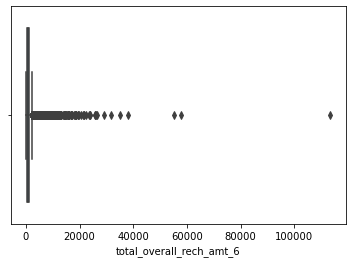

In [52]:
sns.boxplot(churn_data_hvc['total_overall_rech_amt_6'])
plt.show()

Lets check for rows with total overall rech amt 6 > 40000

In [53]:
churn_data_hvc[churn_data_hvc['total_overall_rech_amt_6']>40000].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_overall_rech_amt_6,total_overall_rech_amt_7,total_overall_rech_amt_8,avg_good_phase_rech_amt,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_9
20123,0.0,0.0,0.0,2293.515,1486.889,1368.703,798.693,411.81,225.24,248.84,220.28,1735.51,1010.84,1823.31,932.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.11,194.81,155.19,184.16,773.21,416.01,336.76,136.59,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1060.33,610.83,491.96,320.76,124.69,30.43,93.64,36.11,960.96,594.83,1486.01,795.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1085.66,625.26,1579.66,832.11,1.33,0.0,0.0,0.00,0.00,0.00,2.01,0.00,0.00,0.0,0.0,0.0,2147.33,1236.09,2073.64,1152.88,43.16,79.09,58.61,33.41,196.83,247.14,82.11,80.19,2.23,0.00,0.00,0.00,242.23,326.24,140.73,113.61,1.58,18.31,9.46,1.74,27.44,4.43,18.46,21.98,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,29.03,22.74,27.93,23.73,273.19,356.19,169.14,142.14,0.0,0.0,0.0,0.25,1.93,7.2,0.0

These customers consistently spent higher in good phase, so these outliers are valid values

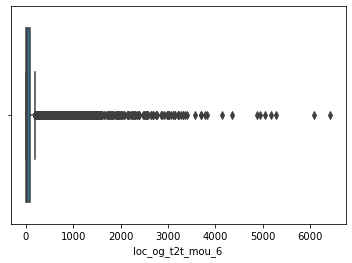

In [54]:
sns.boxplot(churn_data_hvc['loc_og_t2t_mou_6'])
plt.show()

Again, these high values are valid for customers who spent higher

### Check outliers - Ends

### Derive Churn - Starts

In [55]:
churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,27749.000000,27749.000000,27749.000000,27749.000000
mean,282.194205,532.480159,95.710793,353.094839
std,364.683124,671.436184,288.228689,910.392057
min,0.000000,0.000000,0.000000,0.000000
25%,66.280000,78.740000,0.000000,0.000000
50%,173.860000,325.210000,0.000000,0.000000
75%,363.310000,735.330000,44.640000,349.150000
max,7785.730000,11517.730000,8993.950000,26857.040000


Add all above columns to create new column churn, and map non-zero values to 1

In [56]:
churn_data_hvc['churn'] = churn_data_hvc.apply(lambda x: 1 if x['total_ic_mou_9']+x['total_og_mou_9']+x['vol_2g_mb_9']+x['vol_3g_mb_9']==0 else 0, axis=1)
churn_data_hvc['churn'].value_counts()

0    26436
1     1313
Name: churn, dtype: int64

#### Drop all _9 attributes from dataframe

In [57]:
lst_mnth_9_cols = list(filter(lambda x: '_9' in x,churn_data_hvc.columns))
lst_mnth_9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'days_since_last_rech_9']

Drop _9 columns

In [58]:
drop_irrelevant_columns(churn_data_hvc,lst_mnth_9_cols)

In [59]:
churn_data_hvc.shape

(27749, 169)

### Derive Churn - Ends

### Check Churn rate

In [60]:
churn_rate = (sum(churn_data_hvc['churn'])/len(churn_data_hvc['churn'].index))*100
churn_rate

4.731702043316877

#### There's class imbalance which we will be handling later

### EDA - Starts

Some visualization to understand data

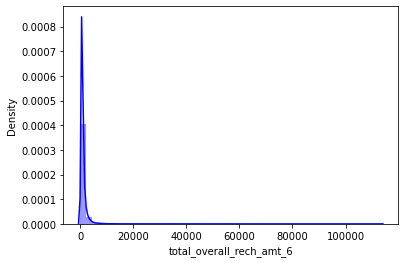

In [61]:
sns.distplot(churn_data_hvc['total_overall_rech_amt_6'],bins=50,color='blue')
plt.show()

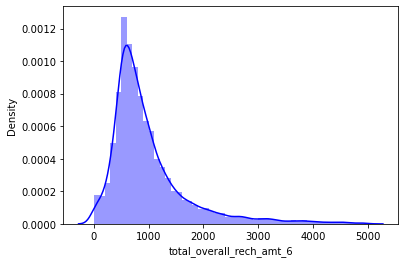

In [62]:
sns.distplot(churn_data_hvc[churn_data_hvc['total_overall_rech_amt_6']<5000]['total_overall_rech_amt_6'],bins=50,color='blue')
plt.show()

Most customers spent between 0 to 1500 in month 6

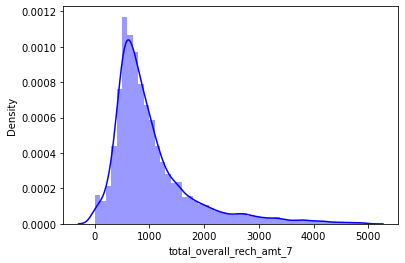

In [63]:
sns.distplot(churn_data_hvc[churn_data_hvc['total_overall_rech_amt_7']<5000]['total_overall_rech_amt_7'],bins=50,color='blue')
plt.show()

Distribution is almost identical in month 7

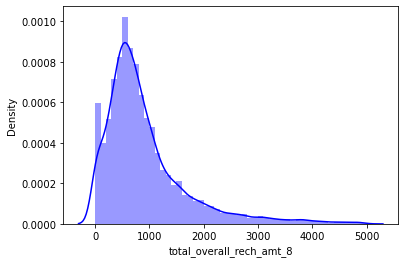

In [64]:
sns.distplot(churn_data_hvc[churn_data_hvc['total_overall_rech_amt_8']<5000]['total_overall_rech_amt_8'],bins=50,color='blue')
plt.show()

and almost same in month 8

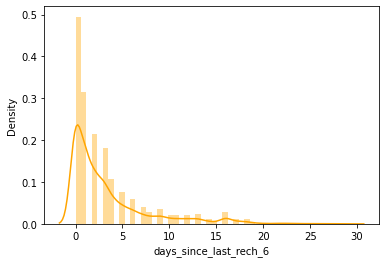

In [65]:
sns.distplot(churn_data_hvc['days_since_last_rech_6'],bins=50,color='orange')
plt.show()

Most people recharged in last 5 days in month 6. Observed same trend for other months.

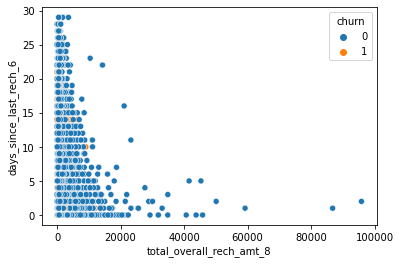

In [66]:
sns.scatterplot(data=churn_data_hvc, x='total_overall_rech_amt_8', y='days_since_last_rech_6', hue='churn')
plt.show()

Most churn cases recharged in middle of the month

In [67]:
pivot_meanrechamt = pd.pivot_table(data=churn_data_hvc, values=['total_overall_rech_amt_6','total_overall_rech_amt_7','total_overall_rech_amt_8'], index='churn', aggfunc='mean')
pivot_meanrechamt = pivot_meanrechamt.reset_index()
pivot_meanrechamt

,churn,total_overall_rech_amt_6,total_overall_rech_amt_7,total_overall_rech_amt_8
0,0,1111.957977,1214.463984,1125.493570
1,1,1107.045636,1095.153145,466.353435


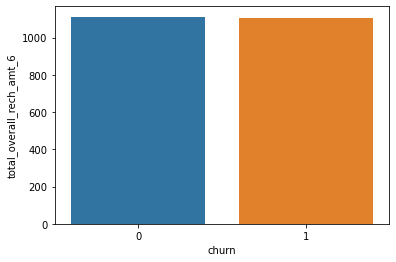

In [68]:
sns.barplot(data=pivot_meanrechamt, x='churn', y='total_overall_rech_amt_6')
plt.show()

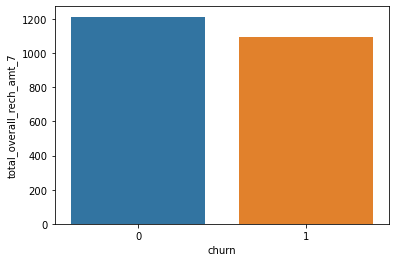

In [69]:
sns.barplot(data=pivot_meanrechamt, x='churn', y='total_overall_rech_amt_7')
plt.show()

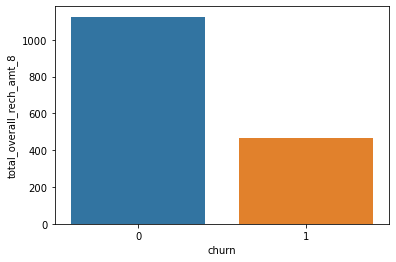

In [70]:
sns.barplot(data=pivot_meanrechamt, x='churn', y='total_overall_rech_amt_8')
plt.show()

Average recharage amount was almost same for month 6 and 7 for churn vs non-churn customers.<br/> However, in month 8, churn cases had a very low average recharge amount.

### EDA - Ends

### Data Preparation - Scaling

In [71]:
# Putting feature variable to X
X = churn_data_hvc.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_data_hvc['churn']

scaler = StandardScaler()
columns_are = list(X.columns)
X[columns_are] = scaler.fit_transform(X[columns_are])
X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_overall_rech_amt_6,total_overall_rech_amt_7,total_overall_rech_amt_8,avg_good_phase_rech_amt,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8
7,0.0,0.0,0.0,1.127529,1.613583,5.258916,-0.452722,-0.460198,-0.418794,0.155059,0.351800,-0.056718,-0.002743,0.266441,0.240021,-0.027784,-0.082860,0.157423,-0.152868,-0.235268,-0.181392,0.567801,1.143563,0.009374,2.468147,2.173532,2.361020,-0.251587,-0.207279,-0.242605,0.426694,0.707533,0.018194,-0.406712,-0.369057,-0.357600,-0.323118,-0.369151,-0.280843,0.401092,1.378713,1.343377,0.0,0.0,0.0,-0.480221,-0.465412,-0.399386,-0.043332,-0.040333,0.173525,-0.078240,-0.328763,-0.019408,-0.15916,-0.016441,-0.017995,-0.193351,-0.055317,-0.331013,-0.055154,-0.217130,-0.238747,0.288700,0.288798,-0.153236,2.928952,1.694586,0.546514,0.607595,0.348583,-0.153782,0.274513,-0.048932,0.213037,0.642216,0.893968,1.059724,2.529331,1.555984,0.948174,0.0,0.0,0.0,0.970068,0.811170,1.033802,0.904807,0.660698,0.361694,0.771962,-0.107922,-0.25943,-0.112027,0.028766,0.278987,1.010287,0.823164,1.048042,-0.753988,-0.746483,-0.377172,1.666817,0.198616,4.938341,8.724909,3.650666,8.402122,-0.751827,-0.756665,4.850262,-0.586752,-0.604907,-0.555152,-0.710360,-0.722851,-0.688674,-0.499921,-0.520330,-0.492645,-0.355102,-0.353094,-0.324096,-0.660139,-0.685116,-0.647819,-0.383711,-0.381511,-0.347151,-0.390955,-0.409548,-0.395785,-0.368324,-0.369306,-0.372839,-0.392005,-0.388012,-0.388965,-0.117517,-0.114162,-0.109874,-0.407597,-0.414723,-0.389466,-0.42738,-0.449816,-0.429781,-0.342158,-0.337743,-0.339641,-0.210214,-0.211645,-0.187165,-1.030186,-1.054570,-0.986363,-0.449309,-0.274688,-0.360997,-0.334939,-0.1578

### Data Preparation - Test Train Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

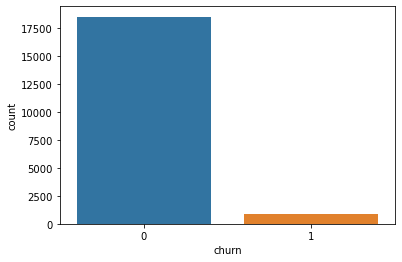

In [73]:
#### Use SMOTE to handle class imbalance
#churn rate - current class imbalance
sns.countplot(y_train)
plt.show()

In [74]:
#Check churn rate with SMOTE balanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=100)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

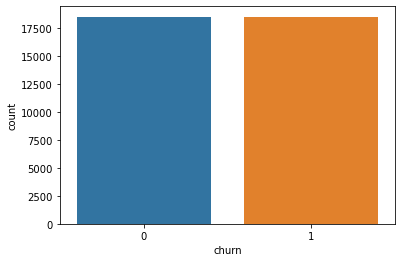

In [75]:
#churn rate - class imbalance is removed
sns.countplot(y_train_smote)
plt.show()

The train data is balanced now

check train and test shape

In [76]:
print('train shape', X_train_smote.shape)
print('test shape', X_test.shape)

train shape (37012, 168)
test shape (8325, 168)


### PCA on the data
#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [77]:
pca = PCA(random_state=100)
pca.fit(X_train_smote)

PCA(random_state=100)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [78]:
colnames = list(X_train_smote.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.shape

(168, 3)

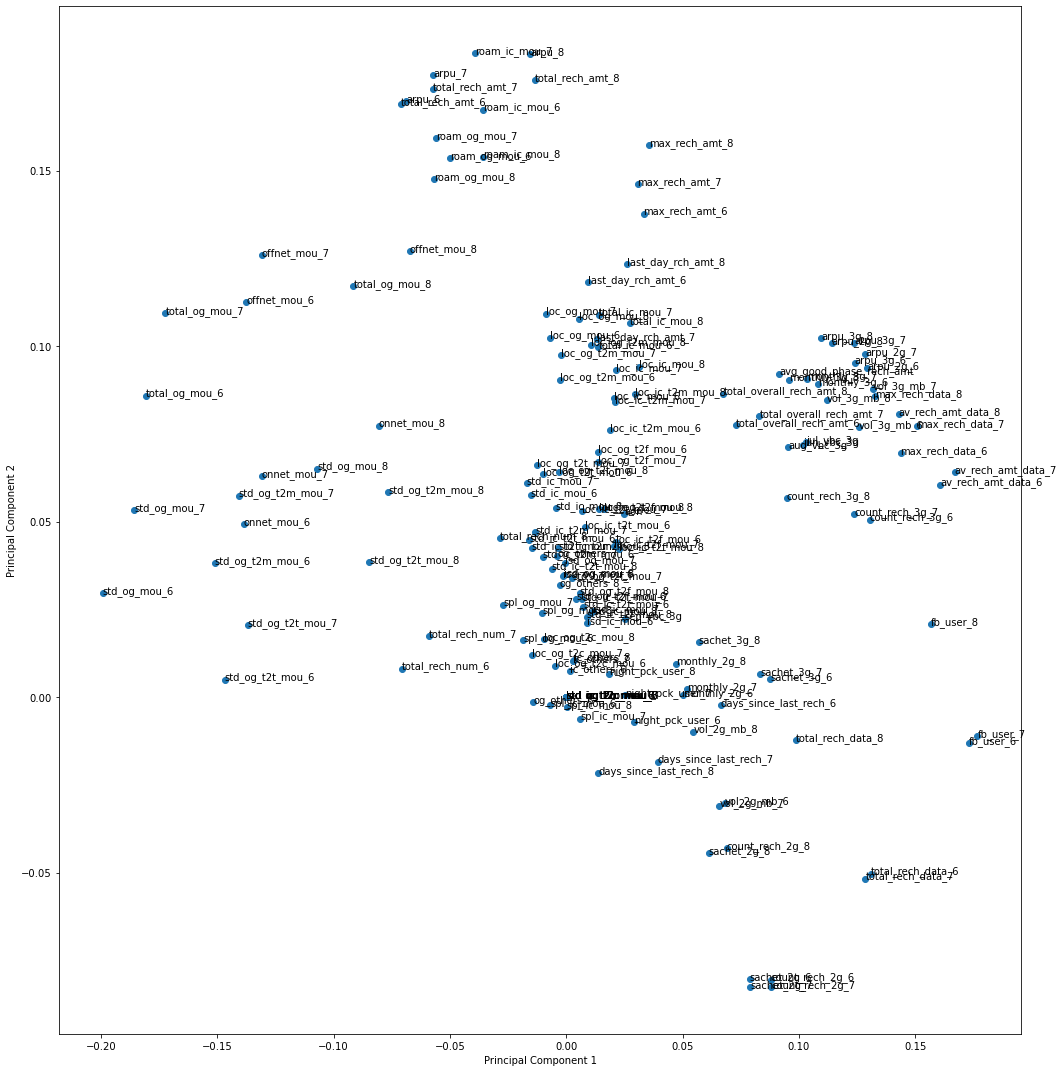

In [79]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [80]:
pca.explained_variance_ratio_

array([1.14982148e-01, 8.40106287e-02, 7.66046774e-02, 5.74841505e-02,
       4.45832564e-02, 3.70714524e-02, 3.38555191e-02, 3.21646888e-02,
       2.78394737e-02, 2.24351259e-02, 2.09364848e-02, 1.97061796e-02,
       1.91220524e-02, 1.63431976e-02, 1.62179481e-02, 1.44302219e-02,
       1.36936317e-02, 1.36343787e-02, 1.32187116e-02, 1.26457457e-02,
       1.22147766e-02, 1.15276534e-02, 1.07318042e-02, 9.85376721e-03,
       9.59105548e-03, 9.46394348e-03, 8.93935782e-03, 8.20360179e-03,
       7.90901688e-03, 7.34303100e-03, 7.07296250e-03, 6.69205585e-03,
       6.45868043e-03, 6.22097995e-03, 6.09593094e-03, 5.86783022e-03,
       5.66961340e-03, 5.28559335e-03, 5.15414260e-03, 5.10371646e-03,
       4.99089145e-03, 4.81765636e-03, 4.79489305e-03, 4.75617707e-03,
       4.60843614e-03, 4.54011598e-03, 4.38141096e-03, 4.22978106e-03,
       4.20236037e-03, 3.96322869e-03, 3.93172913e-03, 3.79588732e-03,
       3.75351597e-03, 3.59428143e-03, 3.46293054e-03, 3.37700715e-03,
      

Screeplot

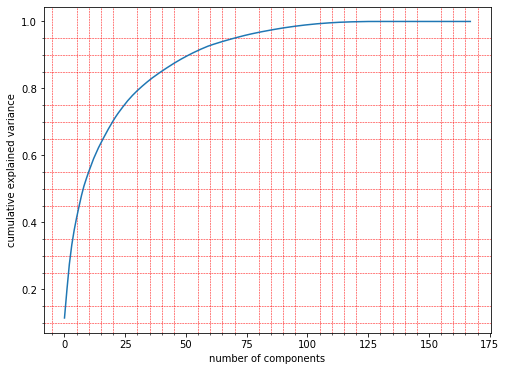

In [81]:
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.minorticks_on()
plt.grid(which="minor",color="red",linestyle = '--', linewidth = 0.5)
plt.show()

About 50 components explains about 90% of variance

In [82]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [83]:
X_train_pca = pca_final.fit_transform(X_train_smote)
X_train_pca.shape

(37012, 50)

In [84]:
#creating correlation matrix for the principal components
corr_mat = np.corrcoef(X_train_pca.transpose())

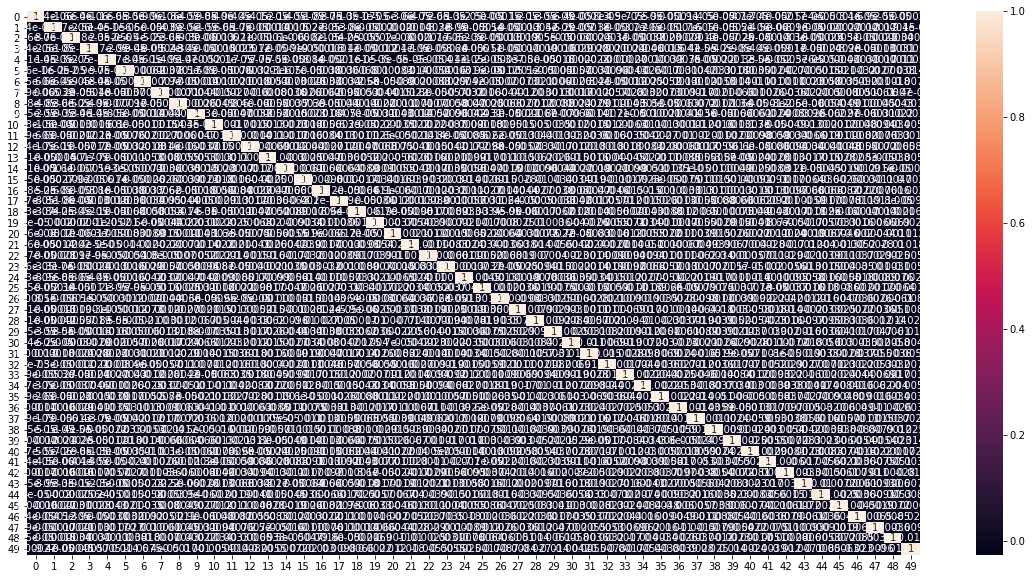

In [85]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat,annot = True)
plt.show()

In [86]:
# 1s -> 0s in diagonals
corrmat_nodiag = corr_mat - np.diagflat(corr_mat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.02498779010986923 , min corr:  -0.026674769488491307


No multi-collinearity in data

In [87]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8325, 50)

### PCA - Ends

Use X_train_pca and X_test_pca going forward

### Model Building - Starts

### Logistic Regression

In [88]:
lr = LogisticRegression()
lr_model = lr.fit(X_train_pca, y_train_smote)
print('training accuracy :=>', lr_model.score(X_train_pca, y_train_smote))

training accuracy :=> 0.8368096833459419


In [89]:
#Predicted probabilities
y_pred_lr = lr_model.predict(X_test_pca)

In [122]:
Eval_metrics(y_test, y_pred_lr,"Logistic Regression")

Confusion matrix is as follows:
[[6457 1473]
 [  62  333]]


,Accuracy%,Sensitivity%,Specificity%,Precision%
Logistic Regression,81,84,81,18


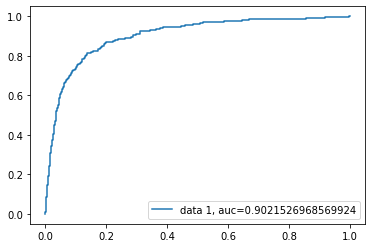

In [91]:
#AUC - checking Area under ROC curve
y_pred_proba = lr_model.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC is approximately 0.9, which is a good threshold.

In [92]:
#Tuning hyperparameters
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5,3,3.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

logistic_reg = LogisticRegression()
random = RandomizedSearchCV(estimator=logistic_reg, param_distributions=param_grid, cv = 3, n_jobs=-1)

random_result = random.fit(X_train_pca, y_train_smote)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.835999 using {'max_iter': 140, 'dual': False, 'C': 2.0}


#### As the Train Accuracy has not increased by a significant amount ,we can continue with previous metrics

#### Decision Trees

In [93]:
## Decision Tree with default hyperparameters
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import os

In [94]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_pca, y_train_smote)

# Predicted probabilities
y_pred_dt = dt_default.predict(X_test_pca)


# Converting y_pred to a dataframe which is an array
y_pred_df_dt = pd.DataFrame(y_pred_dt)

In [123]:
Eval_metrics(y_test, y_pred_dt,"Decision Tree")

Confusion matrix is as follows:
[[6076 1854]
 [ 108  287]]


,Accuracy%,Sensitivity%,Specificity%,Precision%
Logistic Regression,81,84,81,18
Decision Tree,76,72,76,13


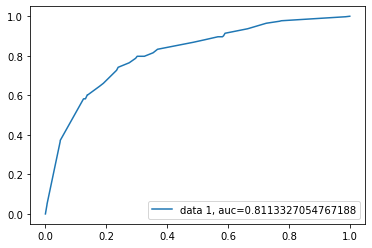

In [96]:
#AUC - checking Area under ROC curve
y_pred_proba = dt_default.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Hyper Parameter Tuning for Decision Tree

In [97]:
para_list = {'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3,4,5],
             'criterion':['gini','entropy']}
scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(dt_default,para_list,scoring=scorer)
grid_fit = grid_obj.fit(X_train_pca,y_train_smote)

In [98]:
best_clf = grid_fit.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [99]:
best_clf_train_predict = best_clf.predict(X_train_pca)
best_clf_test_predict = best_clf.predict(X_test_pca)
#Eval_metrics(y_test, best_clf_test_predict,"Decision Tree")
print('The Training Sensitivity :',recall_score(y_train_smote,best_clf_train_predict))
print('The Test Sensitivity :',recall_score(y_test,best_clf_test_predict))

The Training Sensitivity : 0.9314276450880795
The Test Sensitivity : 0.9164556962025316


### Random Forest

In [100]:
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_train_pca,y_train_smote)

y_pred_rfc=rfc.predict(X_test_pca)

In [124]:
Eval_metrics(y_test, y_pred_rfc,"Random Forest")

Confusion matrix is as follows:
[[7666  264]
 [ 247  148]]


,Accuracy%,Sensitivity%,Specificity%,Precision%
Logistic Regression,81,84,81,18
Decision Tree,76,72,76,13
Random Forest,93,37,96,35


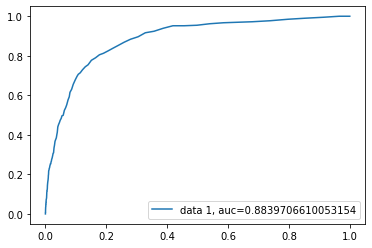

In [102]:
#AUC - checking Area under ROC curve
y_pred_proba = rfc.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [103]:
#Tuning hyperparameters
param_grid = {
    'max_depth': [4,10,18],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

rfc_hyt = RandomForestClassifier()
start_time = time.time()

#Using a Grid search model
rfc_gscv = GridSearchCV(estimator = rfc_hyt, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)

In [104]:
rfc_model = rfc_gscv.fit(X_train_smote, y_train_smote)
print("Execution time: " + str((time.time() - start_time)) + ' ms')
rfc_model

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Execution time: 1297.6238467693329 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 10, 18], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [105]:
rfc_model.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 100}

In [106]:
#Updating the best params
rfc_tuned = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)
rfc_tuned.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [132]:
y_pred_rfc_train = rfc_tuned.predict(X_train_smote)

In [107]:
y_pred_rfc_hyt = rfc_tuned.predict(X_test)

In [133]:
print('The Training Sensitivity Random Forest :',recall_score(y_train_smote,y_pred_rfc_train))
print('The Test Sensitivity Random Forest :',recall_score(y_test,y_pred_rfc_hyt))

The Training Sensitivity Random Forest : 0.9343996541662164
The Test Sensitivity Random Forest : 0.7822784810126582


In [134]:
Eval_metrics(y_test, y_pred_rfc_hyt,"Random Forest")

Confusion matrix is as follows:
[[7386  544]
 [  86  309]]


,Accuracy%,Sensitivity%,Specificity%,Precision%
Logistic Regression,81,84,81,18
Decision Tree,76,72,76,13
Random Forest,92,78,93,36


As we can see, Logistic Regression model had better sensitivity than random forest even after hyperparameter tuning.

Selecting Logistic Regression Model lr_model as final model

### Model Building - to explain predictors

### Logistic Regression Model to explain predictors

#### Perform RFE

In [109]:
from sklearn.feature_selection import RFE

lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe, 30) #select top 30 using RFE
fit = rfe.fit(X_train_smote, y_train_smote)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 30
Selected Features: [False False False False False False False  True  True False  True False
 False False False False False False False False  True False False False
 False False False False False False False False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True  True False  True False False  True False False  True
 False  True  True False False False False False False False False False
 False False  True False False False False False  True False False False
 False False False False False False False False False False False  True
 False False  True False False  True False False False False False False
 False False False False False  True False False  True False False False
 False False False False  True  True False False False False False False
 False False False False  True False False False False False False False
  True  True Fa

In [110]:
# assign the features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train_smote.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,onnet_mou_7,True,1
1,onnet_mou_8,True,1
2,offnet_mou_7,True,1
3,loc_og_t2t_mou_8,True,1
4,loc_og_mou_8,True,1
5,std_og_t2t_mou_7,True,1
6,std_og_t2t_mou_8,True,1
7,total_og_mou_8,True,1
8,loc_ic_t2t_mou_8,True,1
9,loc_ic_t2m_mou_6,True,1


### BUILDING MODELS USING STATSMODEL API

model 1

In [111]:
# building models using statsmodel for better stats
X_train_rfe = X_train_smote[X_train_smote.columns[rfe.support_]]
X_train_rfe

,onnet_mou_7,onnet_mou_8,offnet_mou_7,loc_og_t2t_mou_8,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_mou_8,spl_ic_mou_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,arpu_2g_7,arpu_2g_8,monthly_3g_7,aon,aug_vbc_3g,sep_vbc_3g,total_overall_rech_amt_8,days_since_last_rech_8
0,0.539847,1.030210,0.155898,0.089036,0.080801,0.579814,1.153339,0.928038,-0.252621,-0.370744,-0.218514,-0.340871,-0.332395,-0.163706,-0.195580,-0.131756,-0.25943,-0.122167,-0.670094,0.427451,-0.287865,-0.347151,-0.388012,-0.388965,-0.337743,1.441483,-0.410675,-0.157877,-0.149150,-0.410062
1,-0.221063,-0.000312,-0.109609,0.200428,0.665379,-0.415344,-0.096576,0.383503,-0.270834,-0.291600,0.135246,-0.108979,-0.062136,-0.187058,-0.200478,-0.075159,-0.25943,0.358660,0.924361,1.410053,0.306842,0.542533,1.804819,-0.118454,-0.337743,0.021311,-0.263101,-0.157877,0.338040,0.199474
2,0.462074,1.777282,-0.249877,0.078595,-0.118566,0.346055,2.022471,1.519963,-0.167239,-0.572149,-0.476797,-0.340871,-0.468162,-0.051267,-0.179660,-0.277082,-0.25943,-0.591122,-0.315770,-0.555152,-0.647819,-0.347151,-0.388012,-0.388965,-0.337743,-0.398403,-0.410675,-0.157877,-0.092602,-0.816419
3,-0.452099,-0.274080,1.032810,-0.353041,-0.638992,-0.286763,-0.091392,0.569206,-0.405661,-0.533468,-0.464709,-0.340871,-0.583937,-0.138252,-0.176530,-0.300846,-0.25943,-0.205273,-0.670094,-0.555152,-0.647819,-0.347151,-0.388012,-0.388965,-0.337743,-0.602027,-0.410675,-0.157877,-0.309010,-0.816419
4,-0.030005,-0.218701,1.278683,-0.238239,-0.450303,-0.054500,-0.143680,0.223817,-0.284402,-0.366492,-0.230466,-0.162182,-0.331918,1.215335,0.601515,0.111367,-0.25943,-0.205273,0.251147,-0.555152,-0.647819,-0.347151,-0.388012,-0.388965,-0.337743,-0.089851,-0.410675,-0.157877,-0.298135,-0.410062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37007,1.197099,1.636123,-0.543692,-0.239779,-0.564661,1.359791,1.475748,0.630563,-0.065040,-0.615853,-0.653951,-0.340871,-0.538555,1.028871,0.637528,0.261671,-0.25943,-0.154667,-0.053689,-0.555152,-0.647819,-0.347151,-0.388012,-0.388965,-0.337743,0.769575,-0.410675,-0.157877,-0.166507,-0.321525
37008,-0.157851,0.476282,5.652277,1.389610,0.843172,-0.288656,-0.251499,3.410113,0.158969,0.328361,-0.084271,-0.257210,-0.012495,-0.140555,-0.193661,-0.294130,-0.25943,-0.179969,-0.522230,-0.555152,-0.647819,-0.347151,-0.388012,-0.388965,-0.337743,0.019834,-0.410675,-0.157877,0.207323,-0.507104
37009,1.561756,0.232808,-0.166070,-0.289800,-0.466684,1.936733,0.257492,-0.266630,-0.404170,-0.460500,-0.612964,-0.340871,-0.686608,-0.184297,-0.199089,-0.277646,-0.25943,-0.205273,-0.408864,-0.462276,-0.610837,-0.347151,-0.387941,-0.388965,-0.337743,0.217754,-0.410675,-0.157877,-0.365196,0.517880
37010,-0.216044,-0.511222,0.404221,-0.353041,-0.675065,-0.089107,-0.387250,-0.829639,-0.405661,-0.340135,-0.706068,-0.340871,-0.752364,-0.187058,-0.200478,-0.329742,-0.25943,-0.919870,-0.601928,-0.555152,-0.647819,-0.347151,-0.388012,-0.388965,-0.337743,-0.646173,-0.410675,-0.157877,-0.589786,0.402652


In [127]:
X_train_lm = statsmod.add_constant(X_train_rfe)
log_model = statsmod.OLS(y_train_smote, X_train_lm).fit()

In [128]:
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     998.5
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:23:15   Log-Likelihood:                -15882.
No. Observations:               37012   AIC:                         3.183e+04
Df Residuals:                   36981   BIC:                         3.209e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [130]:
X_train_new = X_train_lm.drop('std_og_t2t_mou_7',axis=1)

Model 2

In [135]:
X_train_new = statsmod.add_constant(X_train_new)
log_model = statsmod.OLS(y_train_smote, X_train_new).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:34:05   Log-Likelihood:                -15883.
No. Observations:               37012   AIC:                         3.183e+04
Df Residuals:                   36982   BIC:                         3.208e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [137]:
X_train_new  = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

In [138]:
log_model = LogisticRegression()
log_model.fit(X_train_new,y_train_smote)
log_model.score(X_train_new,y_train_smote)

0.8449151626499514

In [139]:
y_pred_new = log_model.predict(X_test_new)
print("The accuracy Score for logistic Regression is :", accuracy_score(y_test,y_pred_new))
print('Sensitivity Score for logistic Regression is:',recall_score(y_test, y_pred_new))

The accuracy Score for logistic Regression is : 0.8100900900900901
Sensitivity Score for logistic Regression is: 0.8455696202531645


#### Important Features That Determine Churn by their weights 

In [140]:
log_model.coef_.T

array([[ 0.35182821],
       [ 1.96945821],
       [ 0.60811181],
       [-0.58183153],
       [-0.88172842],
       [-1.53765394],
       [-0.97417527],
       [-0.34883653],
       [ 0.34081113],
       [-0.80817136],
       [-0.8305672 ],
       [-0.86544765],
       [ 0.35561084],
       [-0.30499764],
       [-0.39203652],
       [-0.59323034],
       [ 0.45046417],
       [-0.7812218 ],
       [-0.34465535],
       [-1.28458604],
       [-0.35111231],
       [ 0.50611493],
       [ 0.31700401],
       [-0.41510522],
       [-0.3781293 ],
       [-0.54992569],
       [-0.68120427],
       [ 0.46045433],
       [ 0.41134701]])

In [141]:
np.array([X_train_new.columns[1:-1]]).T

array([['onnet_mou_8'],
       ['offnet_mou_7'],
       ['loc_og_t2t_mou_8'],
       ['loc_og_mou_8'],
       ['std_og_t2t_mou_8'],
       ['total_og_mou_8'],
       ['loc_ic_t2t_mou_8'],
       ['loc_ic_t2m_mou_6'],
       ['loc_ic_t2m_mou_8'],
       ['loc_ic_t2f_mou_8'],
       ['loc_ic_mou_8'],
       ['std_ic_t2t_mou_7'],
       ['std_ic_t2t_mou_8'],
       ['std_ic_mou_8'],
       ['spl_ic_mou_8'],
       ['max_rech_amt_8'],
       ['last_day_rch_amt_8'],
       ['total_rech_data_8'],
       ['av_rech_amt_data_8'],
       ['vol_2g_mb_8'],
       ['arpu_2g_7'],
       ['arpu_2g_8'],
       ['monthly_3g_7'],
       ['aon'],
       ['aug_vbc_3g'],
       ['sep_vbc_3g'],
       ['total_overall_rech_amt_8']], dtype=object)

In [142]:
feature_importance=pd.DataFrame(np.column_stack((np.array([X_train_new.columns]).T, log_model.coef_.T)), columns=['feature', 'importance'])
feature_importance

,feature,importance
0,onnet_mou_7,0.351828
1,onnet_mou_8,1.96946
2,offnet_mou_7,0.608112
3,loc_og_t2t_mou_8,-0.581832
4,loc_og_mou_8,-0.881728
5,std_og_t2t_mou_8,-1.53765
6,total_og_mou_8,-0.974175
7,loc_ic_t2t_mou_8,-0.348837
8,loc_ic_t2m_mou_6,0.340811
9,loc_ic_t2m_mou_8,-0.808171


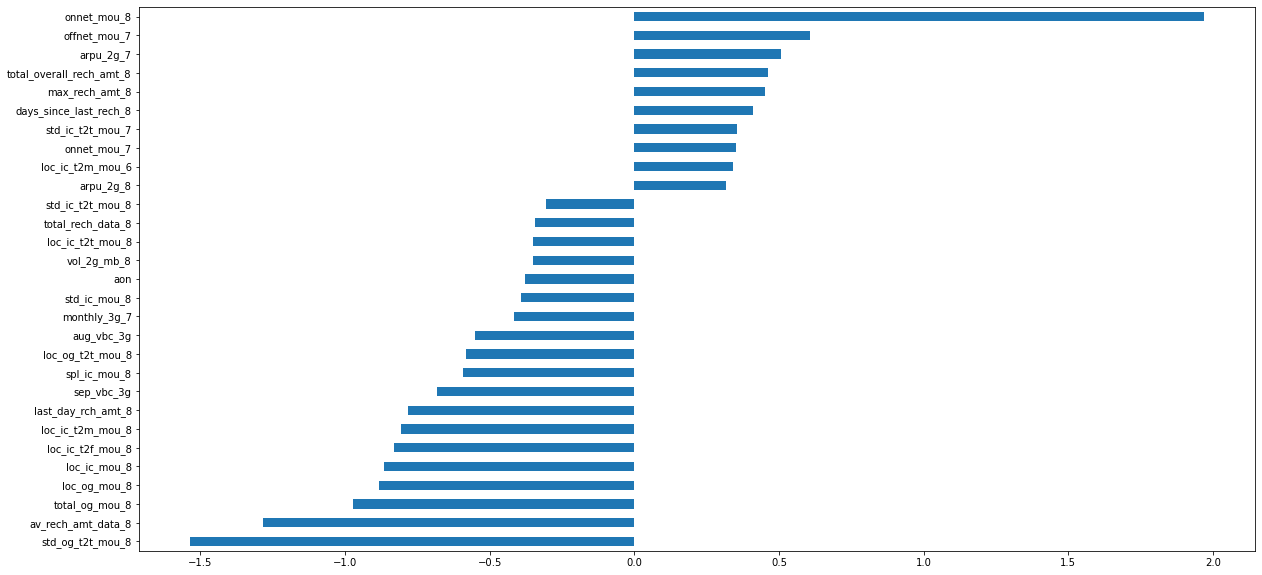

In [143]:
plt.figure(figsize=(20,10))
weights = pd.Series(log_model.coef_[0],
                 index=X_train_new.columns.values)
weights.sort_values().plot(kind = 'barh')
plt.show()

#### Conclusion

Attributes which are strong predictors of the Churn rate are as given in above graph

Recommended Strategy is to target customers whose usage reduced drastically in last month.<br/>
Also, keep a check on outgoing std calls, and a drastic increase may indicate that customer is moving to another state. <br/>Target these types of customers to provide new offers in new state.